# <b> MSc in Data Science - Machiine Learning</b>
# Excercise 2 - Machine Learning Project
# Fashion  MNIST dataset
### <i> Myrsini Karakasoglou (4010), Antigoni Moira (4015), Dimitris Tselentis (4025)</i>

## About the dataset

### Context
MNIST stands for Modified National Institute of Standards and Technology, which is the organization that originally compiled the MNIST dataset, a widely used collection of handwritten digits. The dataset includes handwritten digits from 0 to 9, making it a 10-class classification problem. The MNIST datase is commonly used for training and testing various machine learning algorithms, particularly in the field of computer vision.

Fashion-MNIST is another dataset that shares similarities with the MNIST dataset but focuses on a different type of classification problem. It was introduced as an alternative to MNIST, providing a more challenging task while maintaining a similar structure. Instead of handwritten digits, Fashion-MNIST consists of 10 classes of fashion items. Fashion-MNIST is often used in the same way as MNIST for testing and comparing the performance of various machine learning algorithms and models, particularly in the field of computer vision.

### Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. Each row is a separate image. The first column consists of the class labels, and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image (784 total), while each pixel-value refers to the darkness of the pixel in concern (0 to 255).

The class labels included in both the training and test data set are:
<ul>
    <li>0 - T-shirt/top
    <li>1 - Trouser
    <li>2 - Pullover
    <li>3 - Dress
    <li>4 - Coat
    <li>5 - Sandal
    <li>6 - Shirt
    <li>7 - Sneaker
    <li>8 - Bag
    <li>9 - Ankle boot    
</ul>

## Step 1: Prepare Project
<ol>
    <li>Load libraries</li>
    <li>Load the dataset</li>
    </ol>

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import pandas for managing datasets
import pandas as pd

# Import numpy for multidimensional arrays
import numpy as np

# Import matplotlib for plotting data
from matplotlib import pyplot as plt

# Import seaborn for plotting and styling
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Set display precision for better readability of data
pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Load training data
train_data= pd.read_csv("./dataset_files/fashion-mnist_train.csv")
# Load testing data
test_data= pd.read_csv("./dataset_files/fashion-mnist_test.csv")

## Step 2: Define Problem

The Fashion-MNIST dataset represents a classification problem to solved invlving the identification of the type of clothing or fashion item represented by a given image. The dataset consists of grayscale images of fashion items, and the goal is to train a machine learning model to accurately classify these images into one of ten predefined classes.

In other words, given an input image, the objective is to build a classification model that can correctly assign the corresponding class label, indicating the type of clothing or accessory depicted in the image. This is a common problem in computer vision and machine learning, often referred to as image classification.

## Step 3: Exploratory Analysis

### Take a peek at the training data

In [2]:
# Display an overview of the training data dataframe (get a first idea of the dataset, further explored below)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [12]:
# View the first 5 rows of the training data

train_data.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [13]:
# View the last 5 rows of the training data

train_data.tail()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
59995       0  ...         0         0         0         0         0   
59996       0  ...        73         0         0         0         0   
59997       0  ...       160       162       163       135        94   
59998       0  ...         0         0         0         0         0   
59999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[5 rows x 785 columns]

<i>A first look at the data hints (as expexted) to a considerable number of pixels (features) being white (pixel value = 0) in most images (instances).</i>

In [14]:
# Understand the dimensions of the training data (i.e., how many columns and rows are in the dataset)

print('Shape of the training data', train_data.shape)

Shape of the training data (60000, 785)


The training dataset has 785 features for each image (<i>fist column is the class label</i>) which might lead to increased computational complexity and challenges in building efficient models. However, the dataset contains 10,000 instances which is beneficial for training robust machine learning (classification) models.

In [15]:
# Understand the data types of each attribute

train_data.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

### Further explore the training data

#### Descriptive statistics of the training data

View a summary of important statistical properties for each of the attributes
<ul>
    <li>count: how many values the attribute has</li>
    <li>mean: the mean of all values of the attribute</li>
    <li>standard deviation (std): the amount of variation values have; low std means values are closer to the mean</li>
    <li>minimum value (min)</li>
    <li>25^th percentile (25%): the value under which 25% of the instances can be found</li>
    <li>50^th percentile (50%): the value under which 50% of the instances can be found <i>(also called the median, the value that splits the distribution in half)</i></li>
    <li>75^th percentile (75%): the value under which 75% of the instances can be found</li>
    <li>maximum value (max)</li>
</ul>

In [16]:
train_description = train_data.describe()
train_description

label    pixel1    pixel2    pixel3    pixel4    pixel5    pixel6  \
count 60000.000 60000.000 60000.000 60000.000 60000.000 60000.000 60000.000   
mean      4.500     0.001     0.006     0.035     0.102     0.248     0.411   
std       2.872     0.095     0.271     1.222     2.453     4.307     5.836   
min       0.000     0.000     0.000     0.000     0.000     0.000     0.000   
25%       2.000     0.000     0.000     0.000     0.000     0.000     0.000   
50%       4.500     0.000     0.000     0.000     0.000     0.000     0.000   
75%       7.000     0.000     0.000     0.000     0.000     0.000     0.000   
max       9.000    16.000    36.000   226.000   164.000   227.000   230.000   

         pixel7    pixel8    pixel9  ...  pixel775  pixel776  pixel777  \
count 60000.000 60000.000 60000.000  ... 60000.000 60000.000 60000.000   
mean      0.806     2.198     5.682  ...    34.625    23.301    16.588   
std       8.215    14.093    23.819  ...    57.545    48.854    41.980   
min       0.000     0.000     0.000  ...     0.000     0.000     0.000   
25%       0.000     0.000     0.000  ...     0.000     0.000     0.000   
50%       0.000     0.000     0.000  ...     0.000     0.000     0.000   
75%       0.000     0.000     0.000  ...    58.000     9.000     0.000   
max     224.000   255.000   254.000  ...   255.000   255.000   255.000   

       pixel778  pixel779  pixel780  pixel781  pixel782  pixel783  pixel784  
count 60000.000 60000.000 60000.000 60000.000 60000.000 60000.000 60000.000  
mean     17.869    22.815    17.911     8.521     2.753     0.856     0.070  
std      43.966    51.830    45.149    29.615    17.398     9.357     2.126  
min       0.000     0.000     0.000     0.000     0.000     0.000     0.000  
25%       0.000     0.000     0.000     0.000     0.000     0.000     0.000  
50%       0.000     0.000     0.000     0.000     0.000     0.000     0.000  
75%       0.000     0.000     0.000     0.000     0.000     0.000     0.000  
max     255.000   255.000   255.000   255.000   255.000   255.000   170.000  

[8 rows x 785 columns]

##### <b>Class distribution</b>
Summarise the distribution of instanes accross the ten classes.

In [17]:
train_data.groupby('label').size()

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

In [18]:
# Assign meaningful names to labels

# Manually enter the meaningful name of each label
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Save a copy of train_data as 'full_data'
full_data = train_data.copy()

# Set the meaningful names for display
full_data['label_names'] = full_data['label'].map(lambda x: label_names[x])

# Display the distribution of instances across label names (verify assignment of labels was successful)
full_data.groupby('label_names').size()

label_names
Ankle boot     6000
Bag            6000
Coat           6000
Dress          6000
Pullover       6000
Sandal         6000
Shirt          6000
Sneaker        6000
T-shirt/top    6000
Trouser        6000
dtype: int64

The distribution of instances across the ten classes in the Fashion-MNIST training dataset is uniform. Each class (label) has 6,000 instances, resulting in an equal representation of samples for each category. This is benefitial characteristic of the training dataset fro building and training classification models on this dataset.

A uniform distribution of instances across classes is often desirable in machine learning, as it helps prevent biases toward specific classes during the training of classification models. This balance ensures that the model has sufficient exposure to examples from each class, promoting better generalization and performance on diverse data.

#### <b>Explore the attributes through visualisation</b>

In [19]:
def show_images(df, n, title):

    # Show the first n images in the dataframe along with their labels, taking into consideration
    # the dataframe contains both input data (i.e. image data) and label columns

    # Save the data points as 'input_data'
    input_data = df.iloc[:, 1:] / 255

    # Set the figure size
    plt.subplots(figsize=(10, 2*(n//5)))
    plt.suptitle(title)
    # Show only the first n pictures along with their label name
    for i in range(n):
        plt.subplot(n//5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.array(input_data.iloc[i, :]).reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(full_data.label_names.iloc[i])
    plt.tight_layout()
    plt.show()

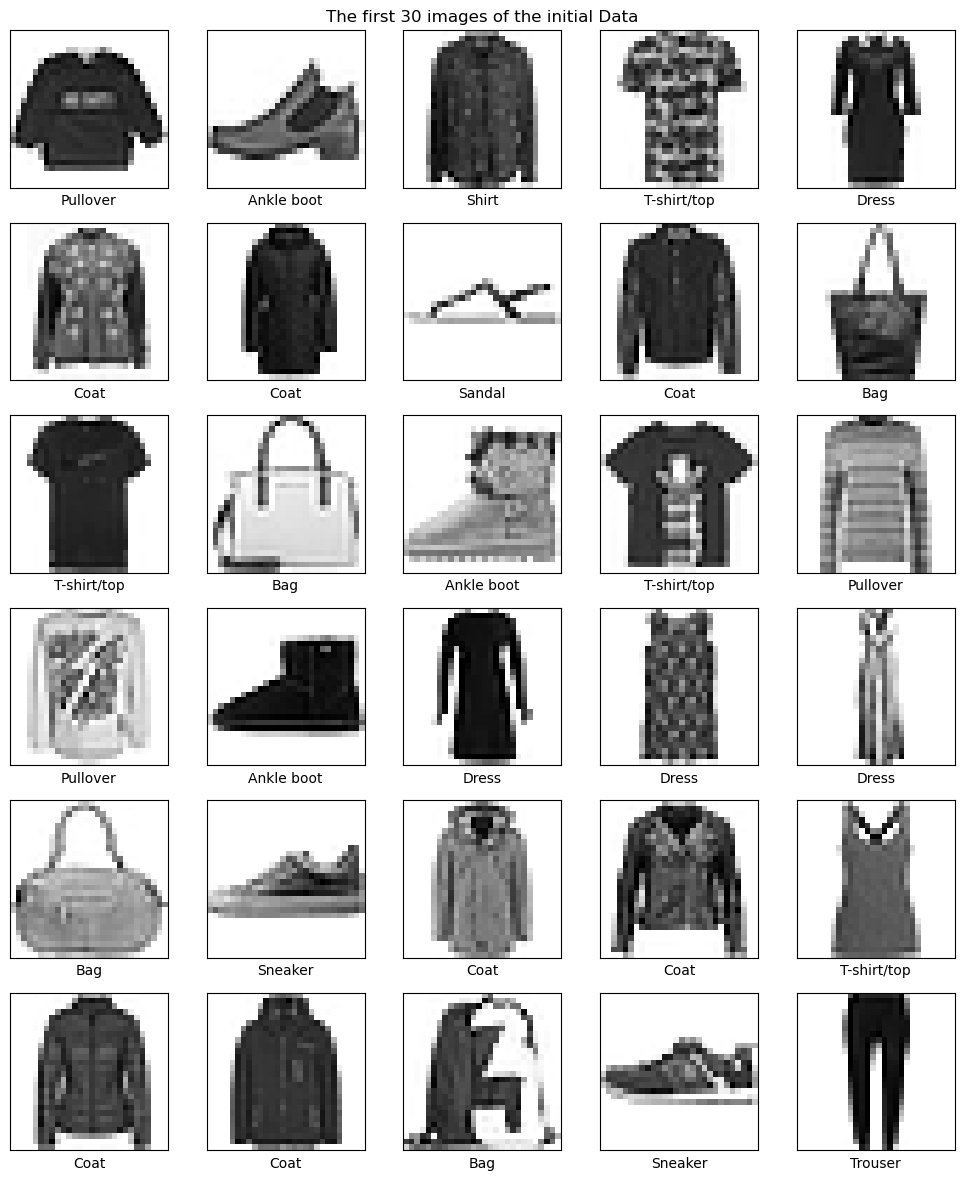

In [20]:
show_images(train_data, 30, 'The first 30 images of the initial Data')

##### <b>Skew of Univariate Distributions</b>
Skewness is a measure of asymmetry. A value close to 0 indicates a relatively symmetric distribution, while positive values indicate a right skewed distribution and negative ones a left-skewed distribution.

In [21]:
train_data.skew()

label        0.000
pixel1     143.091
pixel2      90.419
pixel3     127.905
pixel4      44.613
             ...  
pixel780     2.701
pixel781     4.254
pixel782     7.961
pixel783    14.291
pixel784    47.239
Length: 785, dtype: float64

<i> * As expected for a uniform distribution, the skewness of label is zero. </i>

##### <b>Visualisations of attributes (univariate plots)</b>

<b>Histograms</b>

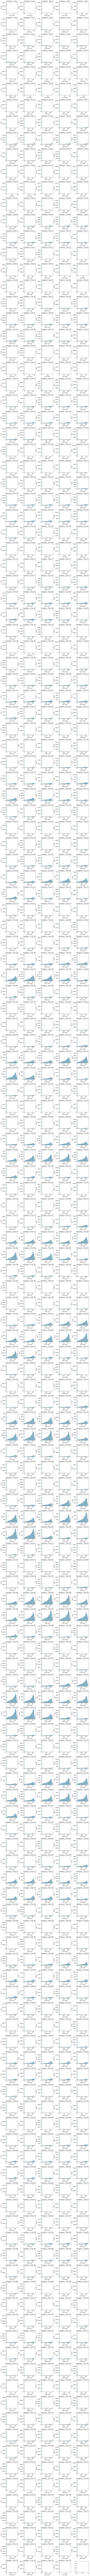

In [22]:
# Visualise distributions of (numeric) features, i.e. pixel values for each feature (pixel) in the images

# Considering the label is in the first column (index 0) and the features start from index 1
features = train_data.iloc[:, 1:]

# Number of features (pixels) in each image
num_features = features.shape[1]

# Determine layout dynamically based on the number of columns
num_cols = 5  # Number of columns in the layout
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows

# Create subplots manually with adjusted figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3*num_rows))

# Flatten the axes to make indexing easier
axes = axes.flatten()

# Visualize histograms for each pixel value
for i, column in enumerate(features.columns):
    sns.histplot(features[column], kde=False, ax=axes[i], color='skyblue', bins=50)
    axes[i].set_title(f'Histogram - Pixel {i + 1}')
    axes[i].set_xlabel('Pixel Value')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the plot
plt.show()

Observing the histograms some general remarks can be extracted:
<ul>
    <li> For a large number of pixels it appears pixel values are (almost) all zero, which means these are brighter (white) pixels in (almost) all images.
    <li> For many of the remaining pixels it appears pixel values are (highly) concentrated in the range 150-250. 
    <li> This skewed distribution towards higher pixel values indicates darker (black) pixels in images.
    <li> This concentration of pixel values in a specific range, could also indicate normalization techniques might prove effective when applying certain algorithms.
    <li> Similarly, for pixels with pixel values concentrated in a specific range, these pixel values might be more informative for distinguishing between classes (labels).
</ul>

<i>We will choose few (6) more informative pixels to get a closer look at the characteristics of the data. We will locate those pixels with values above 150 and pick the top 6 pixels with the largest number of instances above 150.</i>

In [23]:
# Selected pixel to diplay for examples (selecting those with a large number of instances above 150)

# Select columns from the 'train_description' DataFrame where the values in the '75%' row are greater than 150
result_df = train_description.loc[:, (train_description.iloc[6] > 150)]

# Select the top 6 features based on the values in the 'mean' row of the result_df DataFrame
selected_features = result_df.iloc[1].nlargest(6).index.to_list()

# Sort the selected features and store the result
selected_features = sorted(selected_features)

print(selected_features)

['pixel437', 'pixel438', 'pixel465', 'pixel466', 'pixel493', 'pixel494']


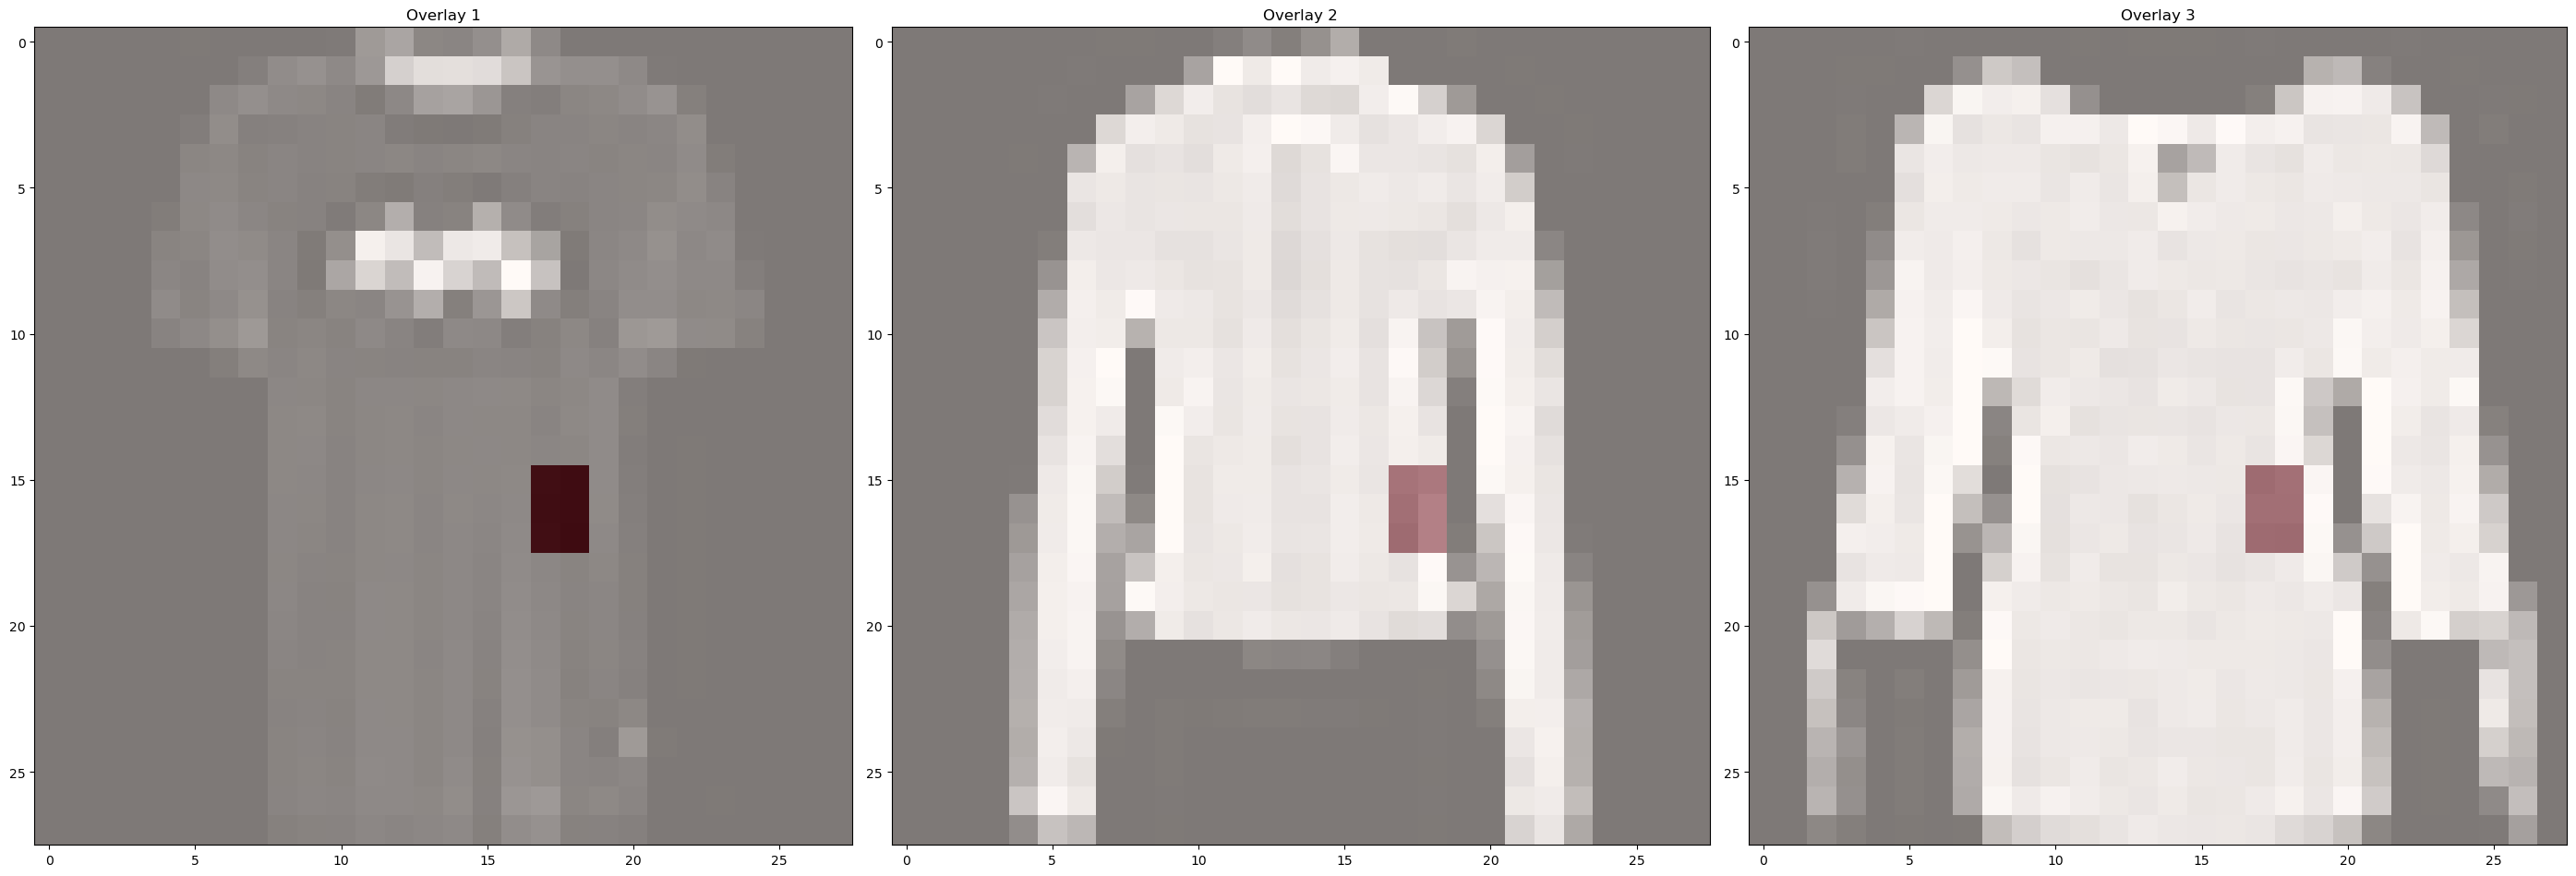

In [24]:
# Get an understanding of where these pixels are in the images.
# For example, pixel382 indicates the pixel that is in column 18 from the left, 
# and row 13 from the top in the 28x28 matrix.

from skimage.transform import resize
from keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(train_images, _), (_, _) = fashion_mnist.load_data()

# Flatten the images and create a DataFrame
pixels_data = train_images.reshape(len(train_images), -1)
column_names = [f'pixel{i}' for i in range(pixels_data.shape[1])]
train_df = pd.DataFrame(pixels_data, columns=column_names)

# Select three random indices
random_indices = np.random.randint(0, len(train_df), size=3)

# Plot the three random images with tripled size and selected features highlighted in red
plt.figure(figsize=(28, 28))
for i, random_index in enumerate(random_indices, 1):
    random_image = train_df.iloc[random_index]
    random_image_np = random_image.values.reshape(28, 28)

    # Create a new image with only the selected features highlighted in red
    highlighted_image = np.zeros_like(random_image_np)
    highlighted_pixels = [int(col.replace('pixel', '')) for col in selected_features]
    highlighted_image.flat[highlighted_pixels] = 255  # Set selected features to 255 (red)

    # Resize the images to triple the size
    random_image_np_resized = resize(random_image_np, (28, 28), anti_aliasing=True)
    highlighted_image_resized = resize(highlighted_image, (28, 28), anti_aliasing=True)

    # Plot overlay of resized original and highlighted image
    plt.subplot(1, 3, i)
    plt.imshow(random_image_np_resized, cmap='gray')
    plt.imshow(highlighted_image_resized, cmap='Reds', alpha=0.5)
    plt.title(f'Overlay {i}')

plt.tight_layout()
plt.show()

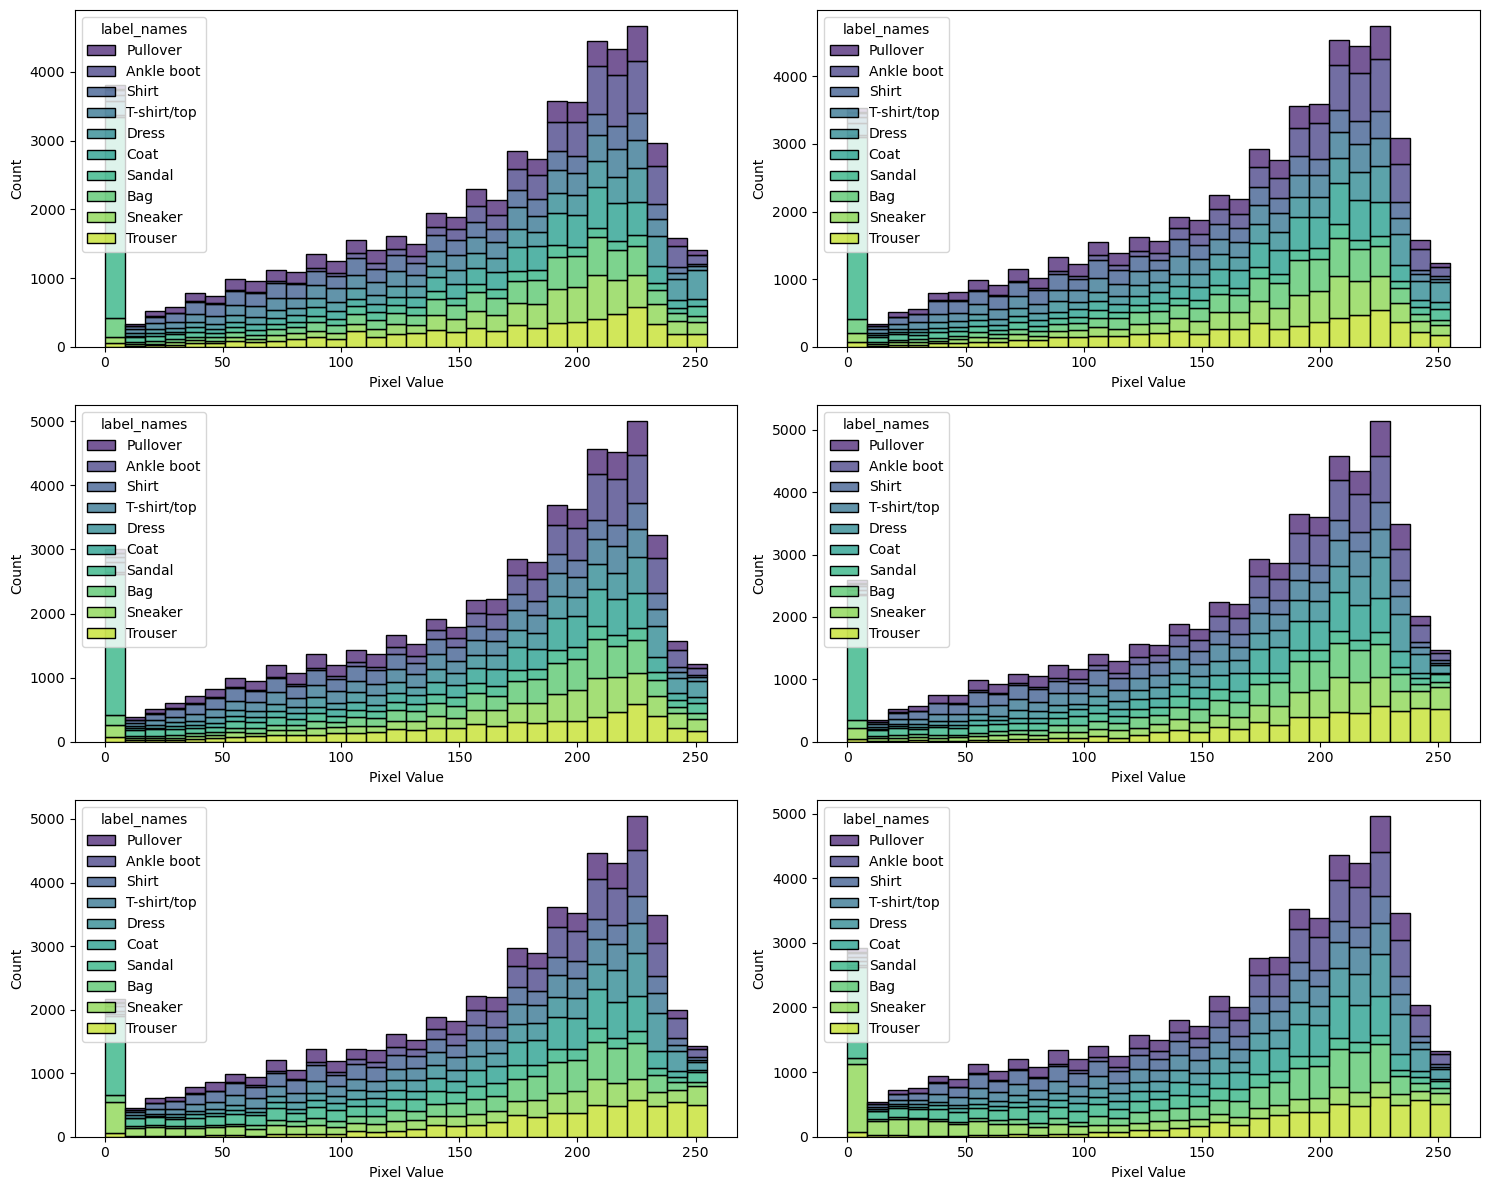

In [16]:
# Create separate histograms for each class (e.g., Pullover, Bag, Shirt, etc.) for some of the features (pixels)
# that have non-zero variance

# Create subplots manually with adjusted figure size
num_rows = (len(selected_features) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 4))

# Flatten the axes to make indexing easier
axes = axes.flatten()

# Visualize density plots for each non-constant pixel value per class
for i, column in enumerate(selected_features):
    sns.histplot(data=full_data, x=column, hue='label_names', multiple="stack", ax=axes[i], palette='viridis', bins=30, kde=False)
    axes[i].set_xlabel('Pixel Value')

# Adjust layout
plt.tight_layout()
plt.show()


<b>Density Plots</b>

A Density Plot  (a.k.a. Kernel Density Plot - KDP) visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise. The peaks of a Density Plot help display where values are concentrated over the interval.

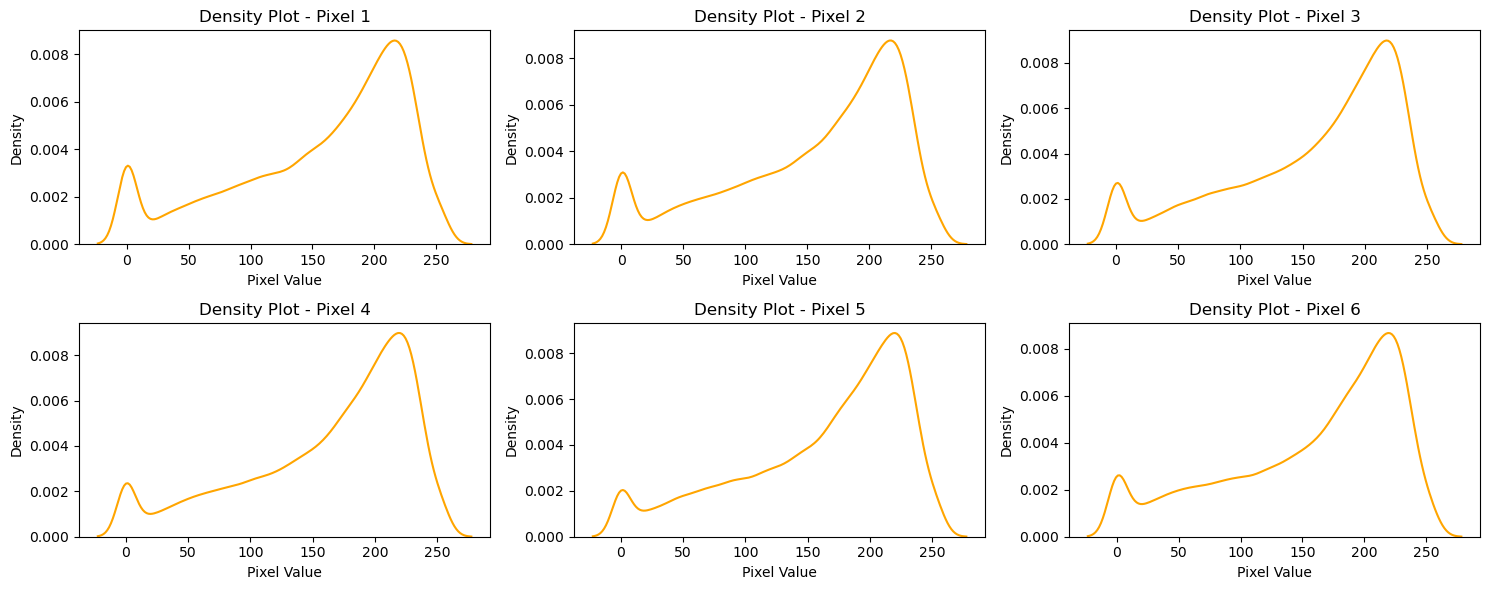

In [17]:
# Get only the columns for selected features
features = train_data[train_data.columns.intersection(selected_features)]

# Number of features (pixels) in each image
num_features = features.shape[1]

# Determine layout dynamically based on the number of columns
num_cols = 3  # Number of columns in the layout
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows

# Create subplots manually with adjusted figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3*num_rows))

# Flatten the axes to make indexing easier
axes = axes.flatten()

# Visualize KDE plots for each pixel value
for i, column in enumerate(features.columns):
    # KDE Plot
    sns.kdeplot(features[column], ax=axes[i], color='orange')
    axes[i].set_title(f'Density Plot - Pixel {i + 1}')
    axes[i].set_xlabel('Pixel Value')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Observing the density plots some general remarks can be extracted:
<ul>
    <li> It appears that for all the pixels their pixel values follow either a unimodal (single peak) or bimodal (two peaks) distribution.
    <li> The density plots hint to potential absence of outliers.
</ul>

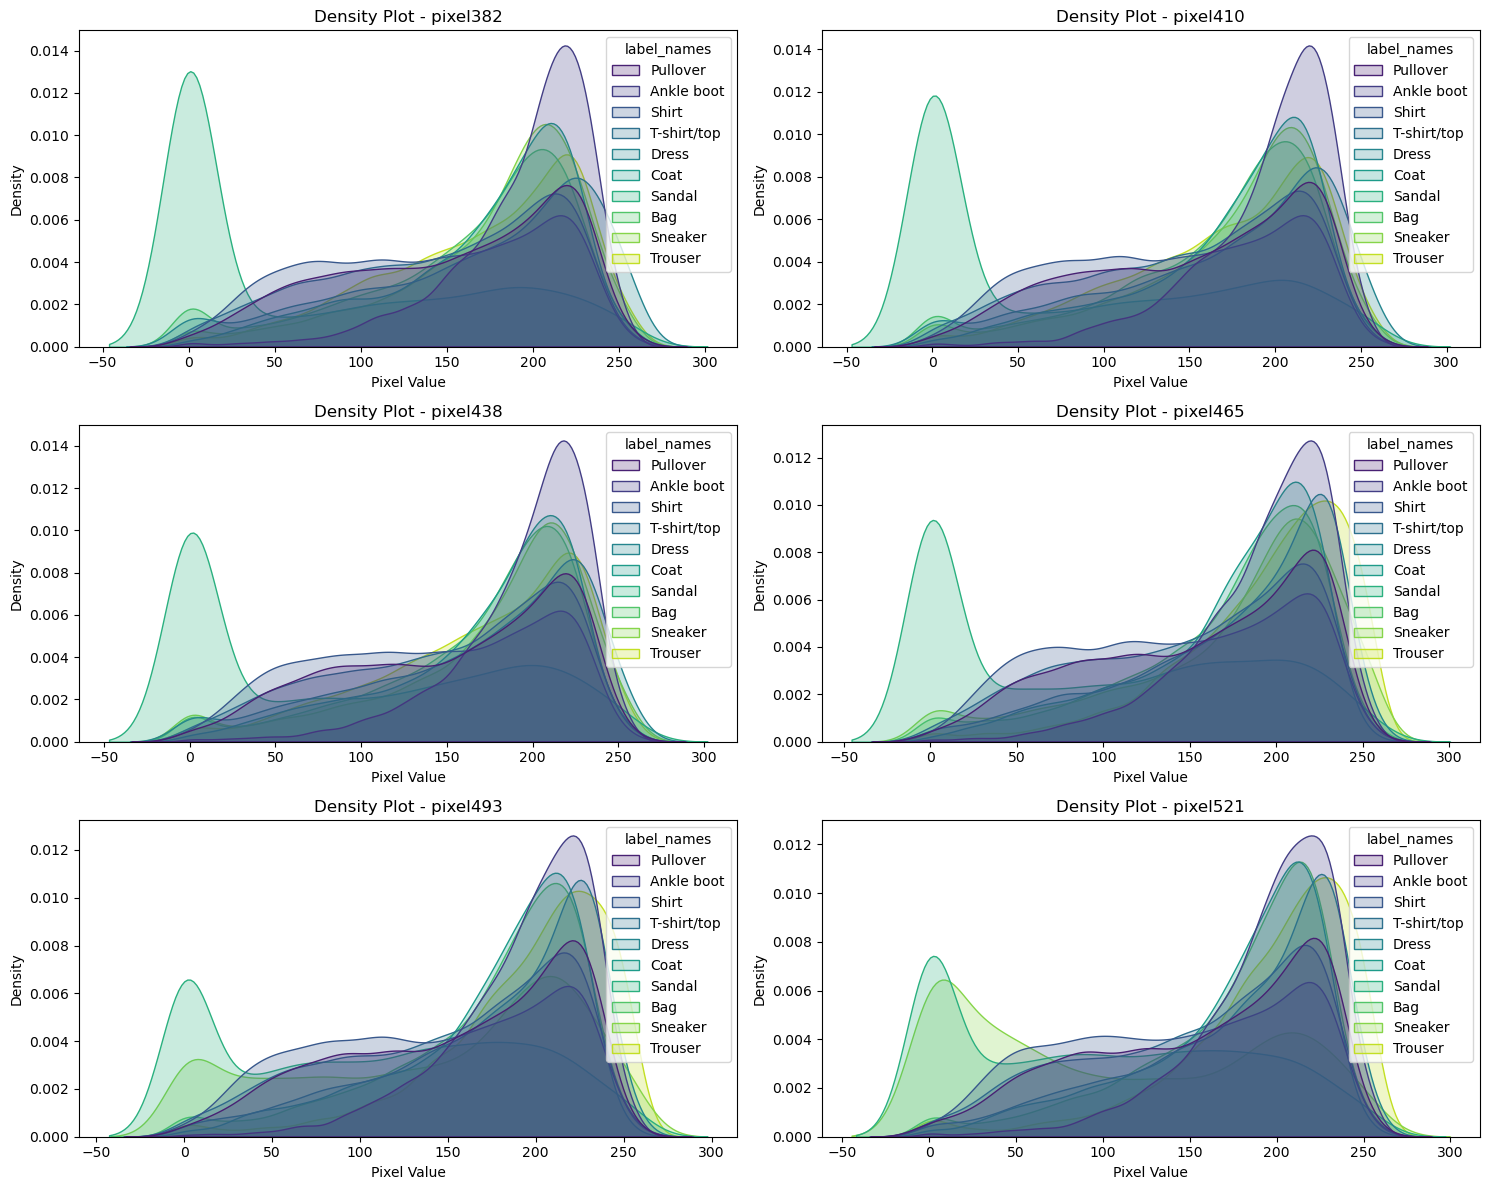

In [18]:
# Create separate density plots for each class (e.g., Pullover, Bag, Shirt, etc.) for some of the features (pixels)
# that have non-zero variance

# Create subplots manually with adjusted figure size
num_rows = (len(selected_features) + 1) // 2 
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 4))

# Flatten the axes to make indexing easier
axes = axes.flatten()

# Visualize density plots for each non-constant pixel value per class
for i, column in enumerate(selected_features):
    sns.kdeplot(data=full_data, x=column, hue='label_names', fill=True, common_norm=False, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Density Plot - {column}')
    axes[i].set_xlabel('Pixel Value')

# Adjust layout
plt.tight_layout()
plt.show()


<b>Box Plots</b>

Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25^th and 75^th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

Considering the large number of attributes, it considered more helpful to plot each attribute seperately (multiple box plots)

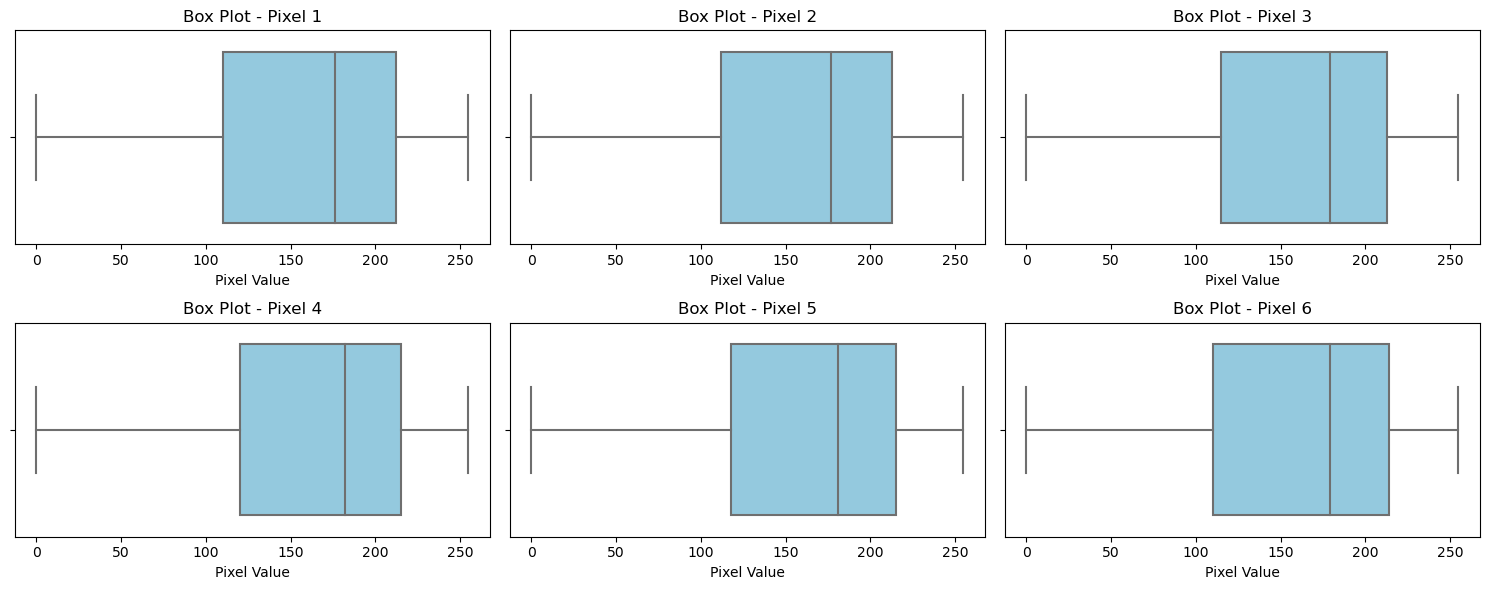

In [19]:
# Get only the columns for selected features
features = train_data[train_data.columns.intersection(selected_features)]

# Number of features (pixels) in each image
num_features = features.shape[1]

# Determine layout dynamically based on the number of columns
num_cols = 3  # Number of columns in the layout
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows

# Create subplots manually with adjusted figure size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3*num_rows))

# Flatten the axes to make indexing easier
axes = axes.flatten()

# Visualize box plots for each pixel value
for i, column in enumerate(features.columns):
    # Box Plot
    sns.boxplot(x=features[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot - Pixel {i + 1}')
    axes[i].set_xlabel('Pixel Value')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Taking into account previous plotted histograms and density plots, observing the boxplots some general remarks can be extracted:
<ul>
    <li> For most of the features (pixels) of non zero variace, it appears these features are skewed. (verification of already calculated skewness of features)
    <li> For most features, it appears there are no outliers present.
</ul>

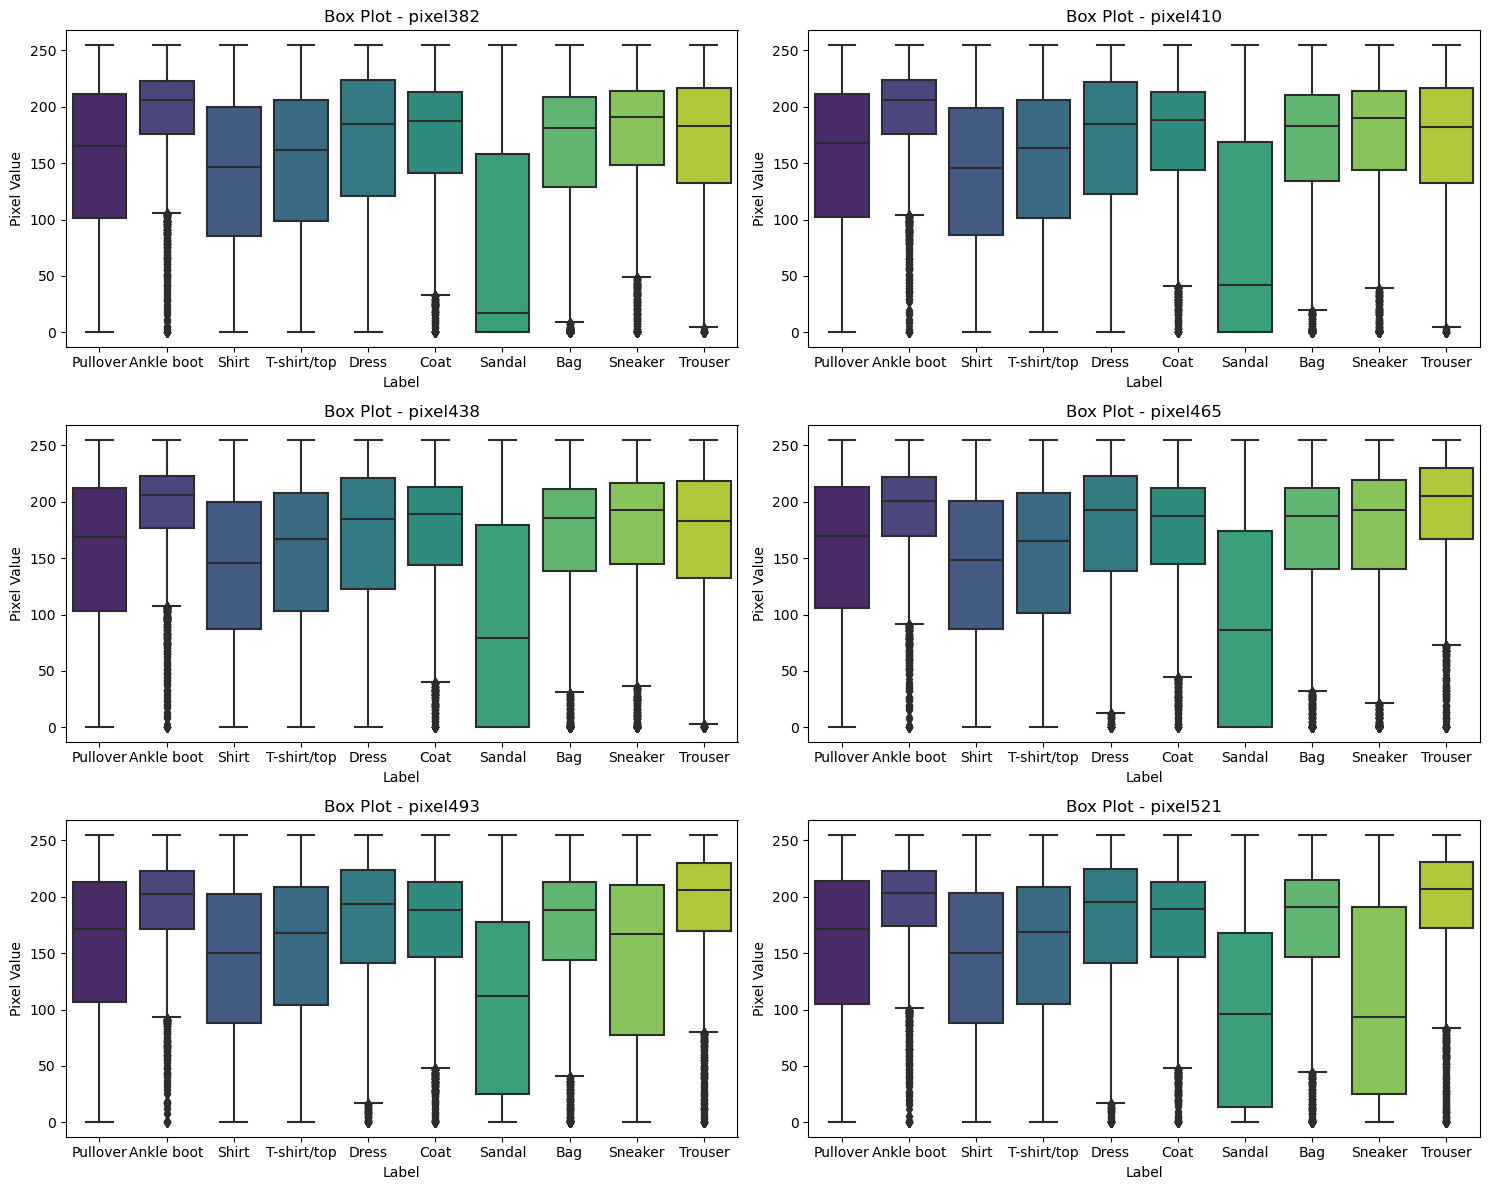

In [20]:
# Create separate box plots for each class (e.g., Pullover, Bag, Shirt, etc.) for some of the features (pixels)
# that have non-zero variance

# Create subplots manually with adjusted figure size
num_rows = (len(selected_features) + 1) // 2  # Adjust based on the number of selected features
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, num_rows * 4))

# Flatten the axes to make indexing easier
axes = axes.flatten()

# Visualize box plots for each non-constant pixel value per class
for i, column in enumerate(selected_features):
    sns.boxplot(data=full_data, x='label_names', y=column, ax=axes[i], palette='viridis')
    axes[i].set_xlabel('Label')
    axes[i].set_ylabel('Pixel Value')
    axes[i].set_title(f'Box Plot - {column}')

# Adjust layout
plt.tight_layout()
plt.show()

#### <b>Correlation between attributes</b>
Correlation refers to the relationship between two variables and how they may or may not change together. We use the Pearson correlation coefficient to measure the linear relationship between all pairs of columns in the DataFrame.
A correlation of -1 or 1 shows a full negative or positive correlation respectively. A value of 0 shows no correlation at all.

<b>Correlation matrix</b>

In [21]:
corr = train_data.corr(method='pearson')

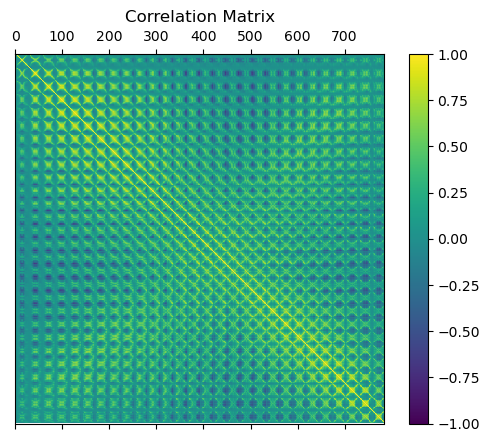

In [22]:
# Plot the correlation matrix

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_yticks([])
plt.title("Correlation Matrix")
plt.show()

The correlation matrix hints to some features (pixels) being highly correlated and in turn potentially the need to apply feature engineering (feature selection and/or dimensionality reduction)

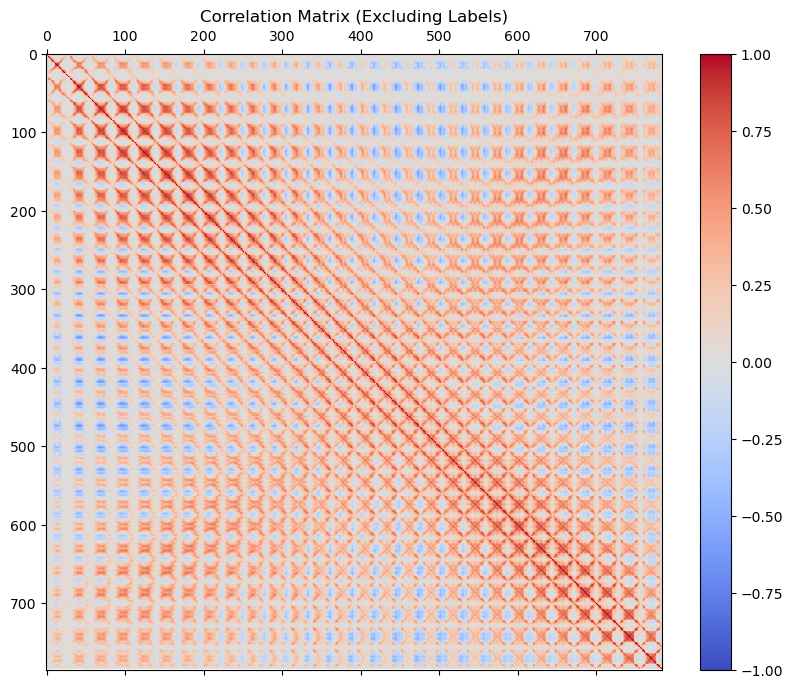

In [23]:
# Explore correlation between features (pixels)
# Exclude labels from the plotted data
# labels = train_data['label']
# features = train_data.drop('label', axis=1)

# Calculate the correlation matrix for features
corr_features = corr.drop('label', axis=1)

# Plot the correlation matrix
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_features, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

plt.title("Correlation Matrix (Excluding Labels)")
plt.show()

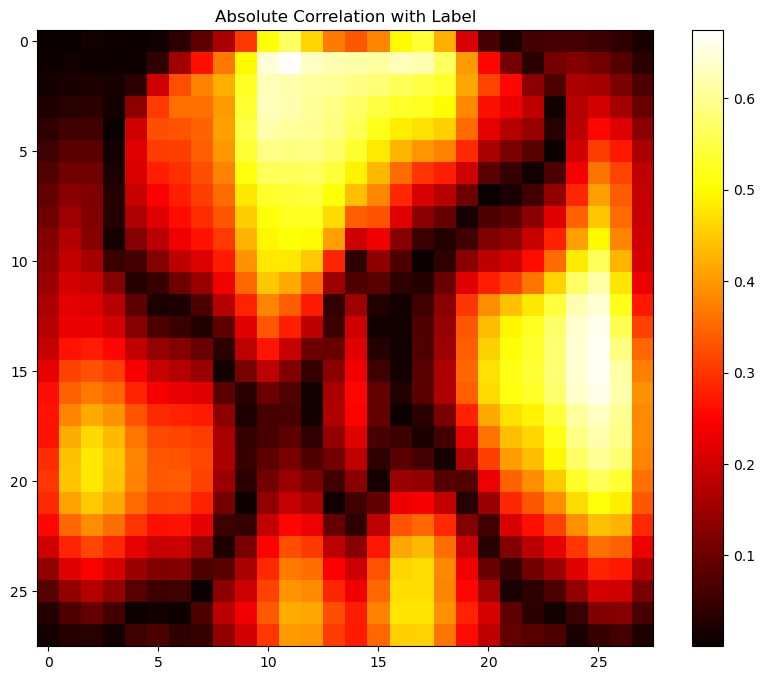

In [24]:
# Calculate the absolute correlation of features with the label variable
cor_label = abs(corr["label"])

# Plot the correlation matrix
fig = plt.figure(figsize=(10, 8))
plt.imshow(abs(corr['label']).to_numpy()[1:].reshape(28, 28), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Absolute Correlation with Label")
plt.show()

## Step 4: Prepare Data

### Data Cleaning

Data cleaning (or data cleansing) routines attempt to fill in missing values, smooth out noise while identifying outliers, and correct inconsistencies in the data.

#### Check for missing values

In [25]:
# Calculates the total number of missing values in the entire training dataset.
train_data.isna().sum().sum()

0

In [26]:
# Calculates the total number of missing values in the entire testing dataset.
test_data.isna().sum().sum()

0

#### Check for outliers

In general, outliers can be classified into three categories, namely **global outliers**, **contextual (or conditional) outliers**, and **collective outliers**.

Since our problem is object recognition from an image, it is easier to distinguish the contextual outliers by answering the following questions:

- What are the acceptable values for each attribute? <br>
    *Answer:* The pixel-value is an integer between 0 and 255 and class label is also an integer between 0 and 9.
- Do all values fall within the expected ranges? <br>
    *Answer:* Αs we can observe from the results of the following code, all values fall within the expected ranges.

In [27]:
print('##### Training dataframe #####')
print('label range: [{}-{}]'.format(train_data['label'].min(), train_data['label'].max()))
print('pixel range: [{}-{}]'.format(train_data.loc[:, train_data.columns != 'label'].min().min(), \
                                      train_data.loc[:, train_data.columns != 'label'].max().max()))
print('All values in training dataframe are of the type: {}\n'.format(train_data.to_numpy().dtype))

print('##### Testing dataframe #####')
print('label range: [{}-{}]'.format(test_data['label'].min(), test_data['label'].max()))
print('pixel range: [{}-{}]'.format(test_data.loc[:, test_data.columns != 'label'].min().min(), \
                                      test_data.loc[:, test_data.columns != 'label'].max().max()))
print('All values in testing dataframe are of the type: {}'.format(test_data.to_numpy().dtype))


##### Training dataframe #####
label range: [0-9]
pixel range: [0-255]
All values in training dataframe are of the type: int64

##### Testing dataframe #####
label range: [0-9]
pixel range: [0-255]
All values in testing dataframe are of the type: int64


<i> * As observed, there are no missing values or contextual outliers, as expected for a dataset created specifically for use as a benchmark to validate machine learning algorithms. For the same reason, it makes no sense to look for any other inconsistencies in the data. Also, if there were other inconsistencies we probably would have noticed them in the previous step of the Exploratory Analysis. </i>

### Data Wrangling

Data wrangling is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it easier to learn from them.

There are three main kinds of tranformations that can be applied:
- **Data standardisation**: <br>
    Transform attributes with a Gaussian distribution to a standard Gaussian distribution (Mean = 0, standard deviation = 1).
- **Data binarisation** (or thresholding): <br>
    Use a threshold to convert values to 1 (above the/equal to threshold) or 0 (below the threshold). Probabilities can be made crisp values.
- **Data normalisation**: <br>
    Try to make attributes use the same scale (range of values).  A typical scale is [0, 1]
    
Based on the problem two different approaches were tested:

1. **Normalisation**: <br>
    This approach was selected because ratains the shape of the original distribution, which was considered important since the values represent the colour of each pixel of the image.

In [3]:
# Create a MinMaxScaler object with a specified feature range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the values in the training dataframe using the MinMaxScaler
normalised_df = pd.DataFrame(scaler.fit_transform(train_data.values), columns=train_data.columns, index=train_data.index)

# Copy the 'label' column from the original training dataframe to the normalized dataframe
normalised_df['label'] = train_data['label']

normalised_df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
1      9   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   
2      6   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.020   
3      0   0.000   0.000   0.000   0.006   0.009   0.000   0.000   0.000   
4      3   0.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0   0.000  ...     0.000     0.000     0.000     0.000     0.000     0.000   
1   0.000  ...     0.000     0.000     0.000     0.000     0.000     0.000   
2   0.000  ...     0.000     0.000     0.000     0.118     0.169     0.000   
3   0.000  ...     0.012     0.000     0.000     0.000     0.000     0.004   
4   0.000  ...     0.000     0.000     0.000     0.000     0.000     0.000   

   pixel781  pixel782  pixel783  pixel784  
0     0.000     0.000     0.000     0.000  
1     0.000     0.000     0.000     0.000  
2     0.000     0.000     0.000     0.000  
3     0.000     0.000     0.000     0.000  
4     0.000     0.000     0.000     0.000  

[5 rows x 785 columns]

2. **Binarisation**: <br>
    Through the conversion of pixels into binary values (0 or 1) based on their grayscale intensity, a shape representation of the object is attained. This approach discards all color information, providing solely a bounding polygon.
    
Selecting a shape representation for images when applying classification algorithms to an image dataset is advantageous for several reasons:

- *Simplicity*: Shape representations simplify the image data by focusing solely on the spatial arrangement of pixels, making it easier for classification algorithms to discern patterns.

- *Dimensionality Reduction*: Representing images based on their shapes could simplify the process of dimensionality reduction.

- *Invariant to Color Variations*: Shape representations are often more robust to variations in color, making the classification model less sensitive to changes in lighting conditions or color differences.

- *Generalization*: Shape-based features can enhance the generalization of classification models across different scenarios and datasets, as they focus on fundamental structural characteristics.

The following code counts how many times the value 0 appears in the list of 75th percentiles for each column in the training dataframe. The count reflects the number of columns where the 75th percentile is equal to zero. Consequently, it can be inferred that approximately 26% of the pixels (calculated as 205 out of 784) are white in 75% of the instances. This suggests that the outlines of the images will be readily established.

In [29]:
train_data.quantile(0.75).to_list().count(0)

205

In [4]:
# Set the threshold value for binarization
# It is assumed that pixels with a value of less than 20 can be considered white.
threshold = 20

# Binarize the training dataframe: set values below the threshold to 0 (white) 
# and values equal to or above the threshold to 1(black)
binarised_df = train_data.mask(train_data < threshold, 0)
binarised_df = binarised_df.mask(binarised_df >= threshold, 1)

# Copy the 'label' column from the original training dataframe to the binarized dataframe
binarised_df['label'] = train_data['label']

binarised_df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       0   
3      0       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         1         1         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

#### Tranformations Comparison:

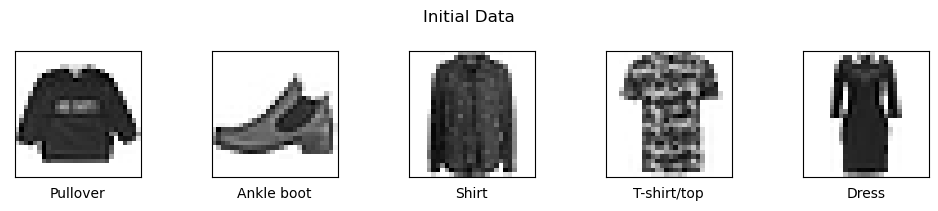

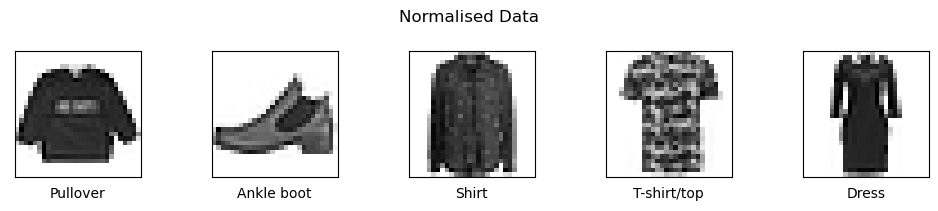

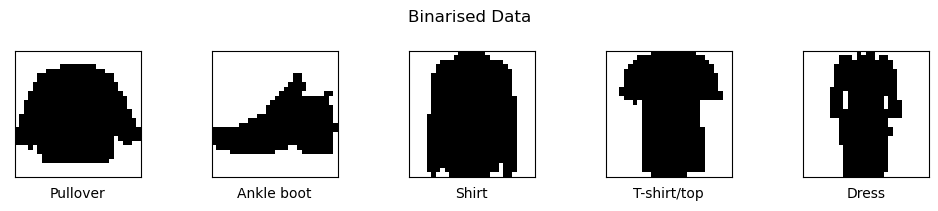

In [31]:
show_images(train_data, 5, 'Initial Data')
show_images(normalised_df, 5, 'Normalised Data')
show_images(binarised_df, 5, 'Binarised Data')

**Comment:** It seems that a pretty informative shape representation of the objects in the images was achieved.

### Collect more data (if necessary)

As indicated in the Exploratory Data Analysis (EDA) step, **the labels demonstrate a uniform distribution**. Each class (label) comprises 6,000 instances, ensuring an equal representation of samples within each category. So, collecting additional data to address potential imbalances among the classes is unnecessary.

An additional criterion to consider when deciding whether to gather more data is **the acceptability of performance on the training set**, encompassing training error, test error, and the desired performance. This aspect will be evaluated in the subsequent step, revealing its level of satisfaction.

Finally, the collection of additional data is considered **out of the scope of this assignment**.

## Step 5: Feature Engineering

### Feature selection

Feature selection is the process of selecting a subset of relevant features  for use in model training. Essentially, the objective is to eliminate from the dataset features that are irrelevant or redundant.

There are two **strategies** for feature selection:
- Score each feature or set of features (The filter strategy) <br>
    Filter type methods select variables regardless of the model
- Search for the best subsets of features automatically during learning
    - The *wrapper* strategy (e.g. search guided by accuracy)
    - The *embedded* strategy (features are selected while building the model based on the prediction errors)

**Comment:** Our choise to proceed with the filter strategy and not with wrapper or embedded is grounded in the following reasons:
1. Computational Efficiency: Filter methods assess feature relevance independently of the chosen model, making them faster and more suitable for large datasets.
2. Better for High-Dimensional Data: In cases where the number of features is large, filter methods seems to be more suitable. Wrapper methods may struggle with high-dimensional data due to increased computational demands.

There are two types of filter methods:

1. **Univariate** filter methods evaluate and rank a single feature according to certain criteria.

Statistical tests can be used to select those features that have the strongest relationship with the label variable.

In [32]:
def check_univariate_corr(df):
    """
    Check univariate correlation between features and the target variable.

    Parameters:
    - df (DataFrame): Input DataFrame containing the data.

    Returns:
    - tuple: A tuple containing:
        - cor_label (Series): Absolute correlation of features with the target variable.
        - features_to_be_removed (list): Names of features with low correlation (less than 0.1) with the target variable.
    """
    # Calculate the Pearson correlation matrix
    correlations = df.corr(method='pearson')

    # Calculate the absolute correlation of features with the label variable
    cor_label = abs(correlations["label"])

    # Select features with low correlation (less than 0.1) with the target variable
    irrelevant_features = cor_label[cor_label < 0.1]
    print("Irrelevant Features with Correlation < 0.1:")
    print(irrelevant_features)

    # Convert the names of irrelevant features to a list
    features_to_be_removed = irrelevant_features.index.tolist()

    return cor_label, features_to_be_removed

#### Check for irrelevant features in Normalised Data:

In [33]:
norm_cor_label, normalised_features_to_be_removed = check_univariate_corr(normalised_df)

Irrelevant Features with Correlation < 0.1:
pixel1     0.001
pixel2     0.003
pixel3     0.010
pixel4     0.007
pixel5     0.005
            ... 
pixel780   0.067
pixel781   0.018
pixel782   0.046
pixel783   0.060
pixel784   0.022
Name: label, Length: 197, dtype: float64


#### Check for irrelevant features in Binarised Data:

In [34]:
bin_cor_label, binarised_features_to_be_removed = check_univariate_corr(binarised_df)

Irrelevant Features with Correlation < 0.1:
pixel2     0.007
pixel3     0.001
pixel4     0.002
pixel5     0.001
pixel6     0.007
            ... 
pixel780   0.075
pixel781   0.033
pixel782   0.033
pixel783   0.060
pixel784   0.021
Name: label, Length: 196, dtype: float64


2. **Multivariate** filter methods, on the other hand, evaluate the entire feature space, by taking into account features in relation to other ones in the dataset.

In [35]:
def high_cor_function(df, threshold):
    """
    Identify and display pairs of highly correlated features in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame containing features.

    Returns:
    - pd.Series: Series containing pairs of highly correlated features.
    """
    
    print('Pairs of highly correlated features:')
    cor = abs(df.corr())
    # Transpose the DataFrame and calculate correlation coefficients
    corrm = np.corrcoef(df.transpose())
    # Subtract diagonal values to get only off-diagonal correlations
    corr = corrm - np.diagflat(corrm.diagonal())
    # Stack and sort correlations in descending order
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    # Filter out self-correlations (correlation with itself)
    high_cor = c1[c1.values!=1]
     # Display pairs of highly correlated features above the threshold
    display(high_cor[high_cor>threshold])
    
    return high_cor[high_cor>threshold]

#### Check for highly correlated (redundant) features in Normalised Data:

In [36]:
high_cor = high_cor_function(normalised_df, 0.95)
for indx, values in high_cor.items():
    if indx[0] != 'label' and indx[1] != 'label':
        # Check if either feature in the pair is in features_to_be_removed
        if indx[0] not in normalised_features_to_be_removed and indx[1] not in normalised_features_to_be_removed:
            # Choose the feature with lower correlation with the label value to be removed
            if norm_cor_label[indx[0]] < norm_cor_label[indx[1]]:
                normalised_features_to_be_removed.append(indx[0])
            else:
                normalised_features_to_be_removed.append(indx[1])

print('Features to be removed from the normalised data: ', sorted(normalised_features_to_be_removed))

Pairs of highly correlated features:


pixel203  pixel231   0.955
pixel232  pixel204   0.953
pixel231  pixel259   0.953
pixel42   pixel43    0.952
pixel260  pixel232   0.952
pixel203  pixel175   0.952
pixel176  pixel204   0.950
dtype: float64

Features to be removed from the normalised data:  ['pixel1', 'pixel108', 'pixel112', 'pixel113', 'pixel114', 'pixel115', 'pixel116', 'pixel136', 'pixel141', 'pixel142', 'pixel143', 'pixel144', 'pixel163', 'pixel164', 'pixel169', 'pixel172', 'pixel189', 'pixel190', 'pixel191', 'pixel192', 'pixel197', 'pixel2', 'pixel200', 'pixel203', 'pixel204', 'pixel21', 'pixel217', 'pixel218', 'pixel219', 'pixel22', 'pixel228', 'pixel23', 'pixel231', 'pixel232', 'pixel24', 'pixel243', 'pixel244', 'pixel245', 'pixel246', 'pixel25', 'pixel256', 'pixel26', 'pixel27', 'pixel270', 'pixel271', 'pixel272', 'pixel28', 'pixel284', 'pixel285', 'pixel29', 'pixel295', 'pixel297', 'pixel298', 'pixel299', 'pixel3', 'pixel30', 'pixel31', 'pixel313', 'pixel314', 'pixel32', 'pixel323', 'pixel324', 'pixel325', 'pixel326', 'pixel327', 'pixel33', 'pixel34', 'pixel341', 'pixel342', 'pixel343', 'pixel344', 'pixel350', 'pixel352', 'pixel353', 'pixel354', 'pixel370', 'pixel371', 'pixel372', 'pixel373', 'pixel378', 'pixel380

#### Check for highly correlated (redundant) features in Normalised Data:

In [37]:
high_cor = high_cor_function(binarised_df, 0.95)
for indx, values in high_cor.items():
    if indx[0] != 'label' and indx[1] != 'label':
        # Check if either feature in the pair is in features_to_be_removed
        if indx[0] not in binarised_features_to_be_removed and indx[1] not in binarised_features_to_be_removed:
            # Choose the feature with lower correlation with the label value to be removed
            if bin_cor_label[indx[0]] < bin_cor_label[indx[1]]:
                binarised_features_to_be_removed.append(indx[0])
            else:
                binarised_features_to_be_removed.append(indx[1])

print('Features to be removed from the binarised data: ', sorted(binarised_features_to_be_removed))

Pairs of highly correlated features:


pixel746  pixel745   0.951
dtype: float64

Features to be removed from the binarised data:  ['pixel108', 'pixel113', 'pixel114', 'pixel115', 'pixel116', 'pixel136', 'pixel141', 'pixel142', 'pixel143', 'pixel144', 'pixel164', 'pixel169', 'pixel171', 'pixel172', 'pixel190', 'pixel191', 'pixel192', 'pixel197', 'pixel199', 'pixel2', 'pixel200', 'pixel21', 'pixel217', 'pixel218', 'pixel219', 'pixel22', 'pixel220', 'pixel227', 'pixel228', 'pixel23', 'pixel24', 'pixel245', 'pixel246', 'pixel25', 'pixel255', 'pixel256', 'pixel26', 'pixel27', 'pixel271', 'pixel272', 'pixel273', 'pixel28', 'pixel284', 'pixel285', 'pixel29', 'pixel295', 'pixel298', 'pixel299', 'pixel3', 'pixel30', 'pixel300', 'pixel31', 'pixel312', 'pixel313', 'pixel314', 'pixel32', 'pixel323', 'pixel325', 'pixel326', 'pixel327', 'pixel33', 'pixel34', 'pixel341', 'pixel342', 'pixel343', 'pixel344', 'pixel350', 'pixel352', 'pixel353', 'pixel354', 'pixel355', 'pixel370', 'pixel371', 'pixel372', 'pixel378', 'pixel380', 'pixel381', 'pixel382', 'pixel383', 'pixel4', 'pixel400'

In [38]:
normalised_selected_df = normalised_df.drop(normalised_features_to_be_removed, axis=1)
binarised_selected_df = binarised_df.drop(binarised_features_to_be_removed, axis=1)

### Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of features

Principal Component Analysis (PCA) algorithm will be used to reduce dimensionality in this problem.

In [6]:
def pca_fit(df, perc_variance):
    """
    Fit a PCA model on the input DataFrame and visualize explained variance.

    Parameters:
    - df (DataFrame): Input DataFrame containing the data.
    - perc_variance (float): Target percentage of explained variance.

    Returns:
    - int: Number of principal components that explain the specified percentage of variance.
    """
    # Initialize PCA with the target explained variance percentage
    pca = PCA(n_components=perc_variance, svd_solver='auto')

    # Fit the PCA model on the data (excluding the 'label' column)
    fit = pca.fit(df.loc[:, df.columns != 'label'])

    # Visualize the explained variance
    plt.figure()
    print('Number of Principal Components: ', len(fit.explained_variance_[:]))
    print(fit.explained_variance_[:])
    
    # Plot the explained variance ratio for each principal component
    plt.plot(fit.explained_variance_ratio_)
    plt.ylabel('Explained Variance')
    plt.xlabel('Principal Components')
    plt.show()

    # Return the number of principal components that explain the specified percentage of variance
    return len(fit.explained_variance_[:])

In [7]:
def pca_inverse_transform(pca, X, Y, title):
    """
    Perform inverse PCA transformation on input data.

    Parameters:
    - pca (object): Principal Component Analysis (PCA) object fitted on the training data.
    - X (array-like): Input data to be transformed.
    - Y (array-like): Labels corresponding to the input data.
    - title (str): Title for displaying the recovered images.

    Returns:
    - pd.DataFrame: Recovered data in DataFrame format with labels.
    """
    # Perform inverse PCA transformation
    X_recovered = pca.inverse_transform(X)

    # Create a DataFrame with recovered pixel values
    df_recovered = pd.DataFrame(X_recovered, columns=['pixel'+str(i) for i in range(1, 785)])

    # Insert labels into the DataFrame
    df_recovered.insert(0, "label", Y, True)

    # Display the recovered images
    show_images(df_recovered, 5, title)

**Fit the PCA model on the Normalized Data** and keep the number of principal components that explain the 95% of variance.

Number of Principal Components:  188
[19.7575402  12.07392155  4.10217102  3.38518939  2.61464133  2.36386926
  1.59653992  1.30368029  0.91513246  0.89288082  0.67409306  0.62251853
  0.52118651  0.44987705  0.41496385  0.4029061   0.37602232  0.36132274
  0.31351997  0.31025586  0.29484866  0.27660838  0.26121747  0.25489949
  0.24650024  0.23904055  0.22729981  0.21707614  0.21091597  0.20110846
  0.18807512  0.18074053  0.17912455  0.17552611  0.16866139  0.16241101
  0.15671585  0.15279998  0.14925865  0.14287643  0.13689341  0.13457524
  0.13227978  0.12521278  0.11976037  0.11689868  0.11447044  0.11167515
  0.11056137  0.10629322  0.10488551  0.10275639  0.10056555  0.09730336
  0.09425794  0.0933364   0.08931935  0.08789016  0.08655003  0.08588561
  0.08372836  0.08227538  0.08039455  0.07924582  0.07855022  0.0763013
  0.0759372   0.07464523  0.07223076  0.07150901  0.07084206  0.06968818
  0.06635145  0.0650757   0.06391593  0.06375931  0.06353423  0.06170681
  0.06078512  0

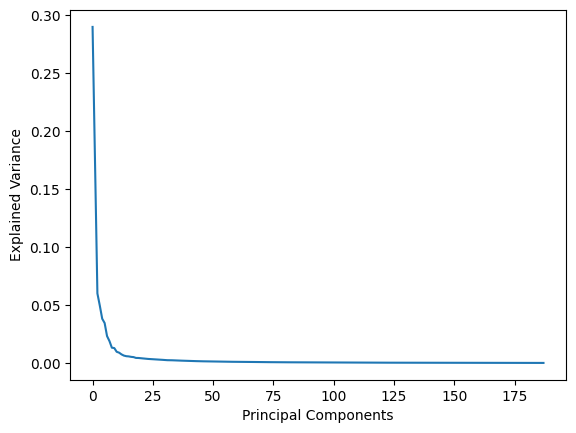

In [8]:
# Remove the 'label' column from the normalised DataFrame
normalised_df_no_label = normalised_df.drop(['label'], axis=1)

# Determine the number of principal components for 95% explained variance
n_components = pca_fit(normalised_df_no_label, 0.95)

# Initialize PCA with the determined number of principal components
norm_pca = PCA(n_components=n_components)

# Fit the PCA model and transform the input data
normalised_pca_X = norm_pca.fit_transform(normalised_df_no_label)

Perform an **inverse PCA transformation** to visually depict the percentage of information lost.

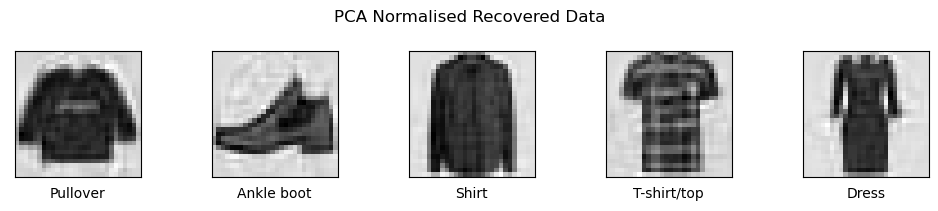

In [42]:
pca_inverse_transform(norm_pca, normalised_pca_X, train_data['label'].tolist(), 'PCA Normalised Recovered Data')

**Fit the PCA model on the Binarised Data** and keep the number of principal components that explain the 95% of variance.

Number of Principal Components:  299
[3.53320500e+01 2.21383485e+01 7.65231829e+00 5.24602288e+00
 4.49497918e+00 3.58493780e+00 3.01222315e+00 1.98516097e+00
 1.77094938e+00 1.54610158e+00 1.31248029e+00 1.15444928e+00
 9.44480617e-01 8.40941102e-01 7.93753815e-01 7.34660955e-01
 6.69086445e-01 6.49980658e-01 6.23088979e-01 6.18841010e-01
 5.57268503e-01 5.38584084e-01 5.24698412e-01 5.07491316e-01
 4.72561718e-01 4.53263282e-01 4.37250287e-01 4.09403110e-01
 4.03051807e-01 3.94027817e-01 3.78835390e-01 3.55987095e-01
 3.46795227e-01 3.36579664e-01 3.29115634e-01 3.16775724e-01
 3.11310233e-01 3.04367647e-01 2.91284971e-01 2.81324036e-01
 2.78043908e-01 2.67270135e-01 2.61135987e-01 2.50201182e-01
 2.40258059e-01 2.34943456e-01 2.32877759e-01 2.22649344e-01
 2.21145507e-01 2.19870949e-01 2.09029939e-01 2.06292564e-01
 2.01233387e-01 1.95756767e-01 1.92513896e-01 1.90567869e-01
 1.84156899e-01 1.78464773e-01 1.74088542e-01 1.71124401e-01
 1.70171093e-01 1.65734994e-01 1.63694080e-01 1.

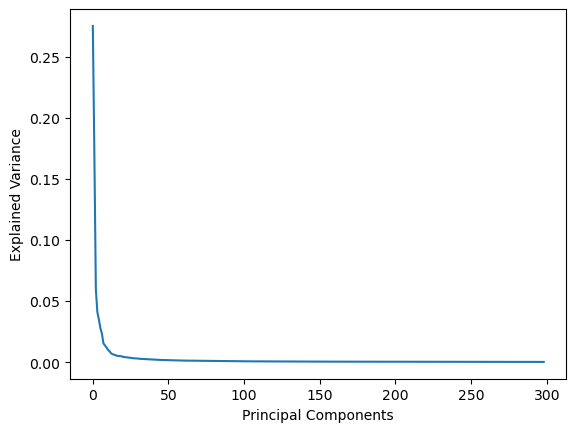

In [43]:
# Remove the 'label' column from the binarised DataFrame
binarised_df_no_label = binarised_df.drop(['label'], axis=1)

# Determine the number of principal components for 95% explained variance
n_components = pca_fit(binarised_df_no_label, 0.95)

# Initialize PCA with the determined number of principal components
bin_pca = PCA(n_components=n_components)

# Fit the PCA model and transform the input data
binarised_pca_X = bin_pca.fit_transform(binarised_df_no_label)

Perform an **inverse PCA transformation** to visually depict the percentage of information lost.

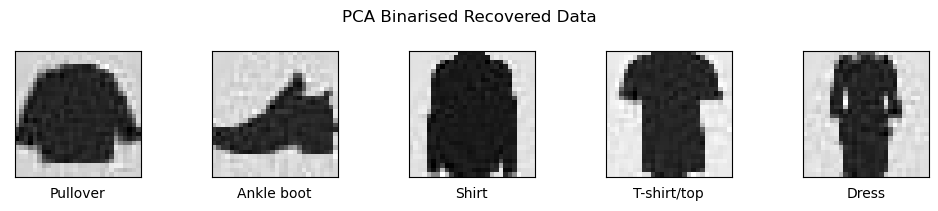

In [44]:
pca_inverse_transform(bin_pca, binarised_pca_X, train_data['label'].tolist(), 'PCA Binarised Recovered Data')

**Comment:** We attempted to execute Kernel PCA to enhance our results, but encountered a memory error (MemoryError: Unable to allocate 26.8 GiB for an array with shape (60000, 60000) and data type float64) because of the basic idea behind Kernel PCA, which is to project the linearly inseparable data onto a higher dimensional space where it becomes linearly separable. In practice, a large dataset leads to a large K (Kernel), and storing K may become a problem.

In [45]:
# Datasets to test at the next step

array = train_data.values
X_train = array[:,1:]
Y_train = array[:,0]

norm_array = normalised_df.values
normalised_X = norm_array[:,1:]

bin_array = binarised_df.values
binarised_X = bin_array[:,1:]

norm_sel_array = normalised_selected_df.values
normalised_selected_X = norm_sel_array[:,1:]

bin_sel_array = binarised_selected_df.values
binarised_selected_X = bin_sel_array[:,1:]

datasets = {
    'baseline' : {
        'X': X_train,
        'Y': Y_train
    },
    'normalised' : {
        'X': normalised_X,
        'Y': Y_train
    },
    'binarised' : {
        'X': binarised_X,
        'Y': Y_train
    },
    'normalised_selected' : {
        'X': normalised_selected_X,
        'Y': Y_train
    },
    'binarised_selected' : {
        'X': binarised_selected_X,
        'Y': Y_train
    },
    'normalised_pca' : {
        'X': normalised_pca_X,
        'Y': Y_train
    },
    'binarised_pca' : {
        'X': binarised_pca_X,
        'Y': Y_train
    },
}

## Step 6: Algorithm Selection

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier

models = []
models.append(('NB',  GaussianNB()))
models.append(('LR',  LogisticRegression(solver='lbfgs', max_iter=100)))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('SVM', SVC()))
# models.append(('RF', RandomForestClassifier()))
# models.append(('XGB', XGBClassifier()))

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import datetime


# Specify a random seed for reproducibility
seed = 7

def perform_cross_validation(X, Y, scoring, n_splits=5):
    """
    Perform cross-validation for a list of models.

    Parameters:
    - X (array): Input features.
    - Y (array): Target variable.
    - scoring (str or callable): Scoring metric for evaluation.
    - n_splits (int, optional): Number of splits for cross-validation. Default is 5.

    Returns:
    - results (dict): Dictionary containing cross-validation results for each model.
    """
    results = {}  # Dictionary to store results for each model
    for name, model in models:
        results[name] = []  # Initialize an empty list for storing results of each fold
        start_time = time.time()  # Record the start time for measuring elapsed time
        kfold = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
        
        # Perform cross-validation and store the results
        cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        
        end_time = time.time()  # Record the end time after cross-validation
        elapsed_time = end_time - start_time  # Calculate the elapsed time
        
        results[name].append(cv_results)  # Append the cross-validation results to the list
        print("%03s: %f (+/- %f) Elapsed Time: %08s" % (name, cv_results.mean(), cv_results.std(), str(datetime.timedelta(seconds=int(elapsed_time)))))
    
    return results

In [59]:
results = {
    'baseline' : {},
    'normalised' : {},
    'binarised' : {},
    'normalised_selected' : {},
    'binarised_selected' : {},
    'normalised_pca' : {},
    'binarised_pca' : {},
}

for dataset in datasets:
    print(f"=== {dataset} ===")
    results[dataset] = perform_cross_validation(datasets[dataset]['X'], datasets[dataset]['Y'], 'accuracy')
    print("================\n")

=== baseline ===
 NB: 0.592317 (+/- 0.016463) Elapsed Time:  0:00:10
 LR: 0.850733 (+/- 0.002328) Elapsed Time:  0:01:32
 DT: 0.791067 (+/- 0.002000) Elapsed Time:  0:03:44
SVM: 0.887850 (+/- 0.002196) Elapsed Time:  0:37:52

=== normalised ===
 NB: 0.590800 (+/- 0.016547) Elapsed Time:  0:00:09
 LR: 0.855617 (+/- 0.002360) Elapsed Time:  0:01:23
 DT: 0.790933 (+/- 0.002244) Elapsed Time:  0:03:21
SVM: 0.887817 (+/- 0.002168) Elapsed Time:  0:37:42

=== binarised ===
 NB: 0.633067 (+/- 0.011316) Elapsed Time:  0:00:09
 LR: 0.852967 (+/- 0.000915) Elapsed Time:  0:01:23
 DT: 0.807767 (+/- 0.002725) Elapsed Time:  0:01:14
SVM: 0.883417 (+/- 0.001672) Elapsed Time:  0:36:08

=== normalised_selected ===
 NB: 0.616133 (+/- 0.013371) Elapsed Time:  0:00:06
 LR: 0.852067 (+/- 0.001502) Elapsed Time:  0:01:06
 DT: 0.792417 (+/- 0.003078) Elapsed Time:  0:02:29
SVM: 0.887300 (+/- 0.002699) Elapsed Time:  0:30:20

=== binarised_selected ===
 NB: 0.645800 (+/- 0.012060) Elapsed Time:  0:00:07
 LR

baseline


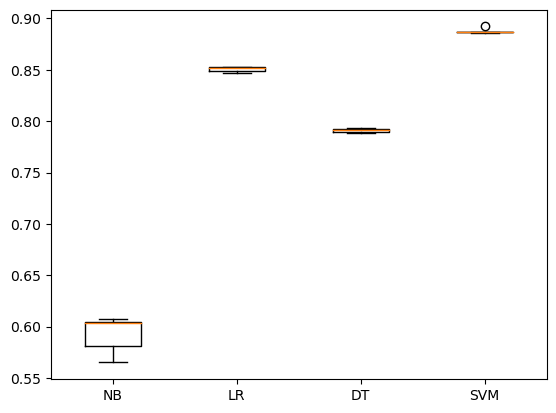

normalised


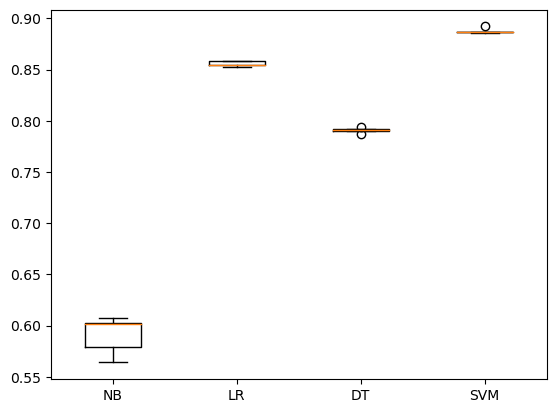

binarised


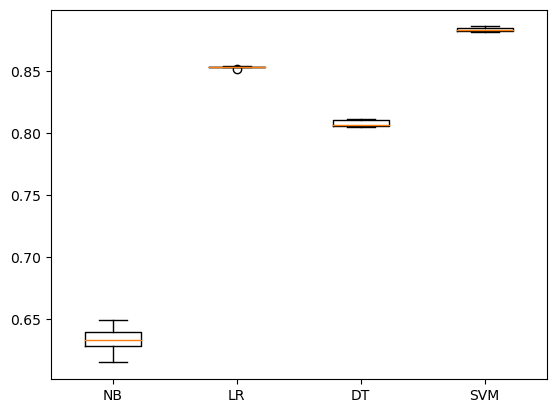

normalised_selected


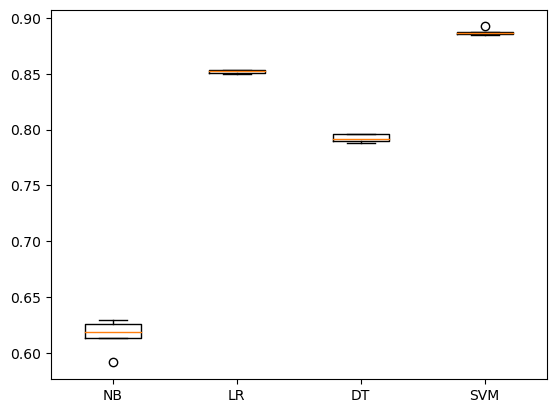

binarised_selected


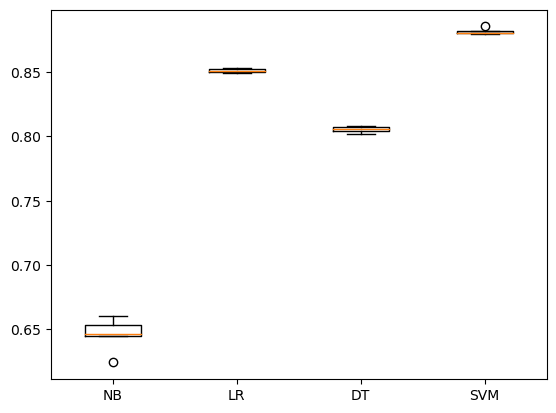

normalised_pca


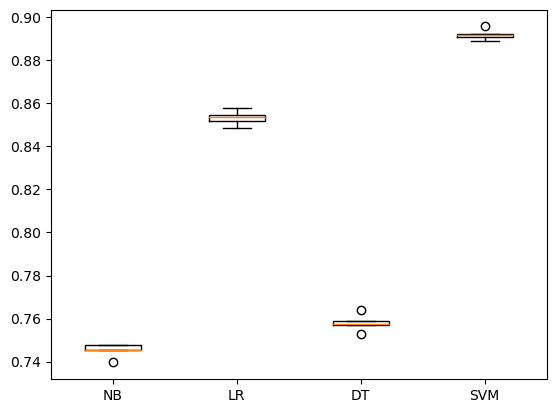

binarised_pca


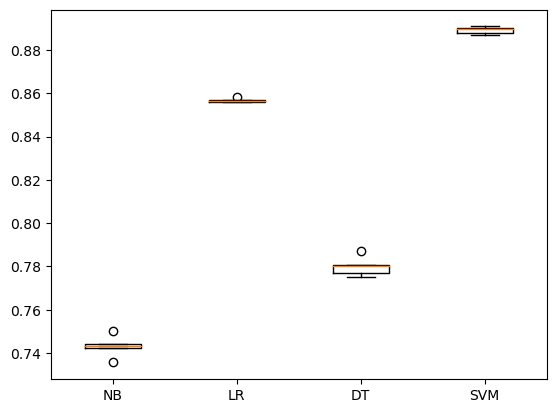

In [69]:
for dataset in results:
    print(dataset)
    
    sum_results = []
    for model in results[dataset]:
        sum_results.append(results[dataset][model][0].tolist())
        
    algorithms_names = list(results[dataset].keys())
    plt.boxplot(sum_results)
    plt.xticks(list(range(1,len(algorithms_names)+1)), algorithms_names)
    plt.show()

- We saw that the svm is doing great so we will continue with this classifier
- We also saw that the fastest run (with the same metric as the previus models) was the svm with the normalized + pca data

In [11]:
# split our data to X and y
X_train = train_data.drop("label", axis=1).values # <-- here you normalize etc
y_train = train_data["label"].values
X_test = test_data.drop("label", axis=1).values # <-- here you normalize etc
y_test = test_data["label"].values

X_train = X_train.astype('float')
X_test = X_test.astype('float')

#normalising the data 
X_train /= 255 # <-- here you can use ninmaxscaler
X_test /= 255 # <-- here you can use ninmaxscaler


# start of pca
pca = PCA()

# keep 95% of the variance
target_variance = 0.95
num_components = next(i for i, cum_var in enumerate(pca.explained_variance_ratio_.cumsum()) if cum_var >= target_variance)

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components)

# this makes the pca on the x train,x test data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# SVM hyperparameters
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Create SVM model
svm_model = SVC()
random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=svm_params, n_iter=10, cv=5, scoring='accuracy', random_state=9)
random_search_svm.fit(X_train_pca, y_train)


# Get the best hyperparameters for SVM
best_params_svm = random_search_svm.best_params_
print("Best Hyperparameters for SVM:", best_params_svm)

Best Hyperparameters for SVM: {'kernel': 'rbf', 'C': 10}


In [14]:
from sklearn.metrics import classification_report

# Create and train the best SVM model
svm_model = SVC(kernel= 'rbf', C= 10, probability=True)
svm_model.fit(X_train_pca, y_train)

# Make predictions and evaluate the SVM model
svm_predictions = svm_model.predict(X_test_pca)

print("Classification Report for SVM:")
print(classification_report(y_test, svm_predictions))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.83      0.84      1000
           3       0.91      0.92      0.91      1000
           4       0.86      0.88      0.87      1000
           5       0.99      0.96      0.97      1000
           6       0.79      0.74      0.76      1000
           7       0.94      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

